In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
data = pd.read_csv("data/data.csv", sep=",").values
exp_data = []
for i in range(len(data)):
    ser_ = pd.read_csv("data/" + data[i, 6], sep=" ", header=None).values
    exp_data.append(ser_)
# exp_data = pd.DataFrame(exp1_data)
print(exp_data)

[array([['block1', 12, 1, 1129],
       ['block1', 12, 1, 1647],
       ['block1', 12, 1, 979],
       ['block1', 124, 3, 4000],
       ['block1', 6, 1, 449],
       ['block1', 12, 1, 970],
       ['block1', 18, 1, 1172],
       ['block1', 18, 1, 1114],
       ['block1', 118, 3, 4000],
       ['block1', 24, 1, 572],
       ['block1', 124, 3, 4000],
       ['block1', 106, 3, 4000],
       ['block1', 18, 1, 1036],
       ['block1', 118, 3, 4000],
       ['block1', 12, 1, 1549],
       ['block1', 106, 3, 4000],
       ['block1', 6, 1, 761],
       ['block1', 18, 1, 764],
       ['block1', 18, 1, 640],
       ['block1', 24, 1, 812],
       ['block1', 118, 3, 4000],
       ['block1', 18, 1, 508],
       ['block1', 112, 3, 4000],
       ['block1', 12, 1, 625],
       ['block1', 6, 1, 446],
       ['block1', 124, 3, 4000],
       ['block1', 12, 1, 540],
       ['block1', 18, 1, 669],
       ['block1', 12, 1, 447],
       ['block1', 6, 1, 699],
       ['block1', 6, 1, 370],
       ['block1', 6

In [70]:
data = []
for i in range(len(exp_data)):
    # set_ = []
    for j in range(len(exp_data[i])):
        data.append(exp_data[i][j][1:])
# data.append(set_)


In [71]:
tar_sets = [[],[],[],[]]
emp_sets = [[],[],[],[]]
# print(data)
print(len(data))
for i in range(len(data)):
    if(data[i][0] < 100):
        tar_sets[int((data[i][0]-6)/6)].append(data[i][1:])
    else:
        emp_sets[int((data[i][0]-106)/6)].append(data[i][1:])
# print(tar_sets)
# print(emp_sets)

480


In [72]:
# print(tar_sets[0])
right_tar = [[],[],[],[]]
right_emp = [[],[],[],[]]
for i in range(len(tar_sets)):
    c = 0
    w = 0
    for j in range(len(tar_sets[i])):
        if(tar_sets[i][j][0] == 1):
            c = c + 1
            right_tar[i].append(tar_sets[i][j][1])
    for j in range(len(emp_sets[i])):
        if(emp_sets[i][j][0] != 1):
            w = w + 1
            right_emp[i].append(emp_sets[i][j][1])
    print(c, w)

79 39
80 39
79 38
77 38


In [73]:
avg_rts = []
for i in range(len(right_tar)):
    avg_rts.append(np.average(right_tar[i]))
print(avg_rts)

[834.5443037974684, 1034.35, 912.8101265822785, 917.8441558441558]


In [74]:
for i in range(len(right_tar)):
    print(right_tar[i].sort())
    bins = [i for i in range(0, 4100, 100)]
    labels = ['{}-{}'.format(x, y-.1) for x,  y in zip(bins[:], bins[1:])]
    frame = pd.Series(right_tar[i])
    ncut = pd.cut(frame, bins=bins, labels=labels, right=False)
    freq = lambda x: len(x) / x.sum()
    freq.__name__ = 'freq'
    out = pd.concat([ncut, frame], axis=1).groupby(0).agg(['size', 'std', 'mean', freq])
    print(frame.mean())
    print(frame.median())
    print(frame.std())
    print(out)

None
834.5443037974684
657.0
530.9102922308292
               1                                  
            size        std         mean      freq
0                                                 
0-99.9         0        NaN          NaN       NaN
100-199.9      0        NaN          NaN       NaN
200-299.9      0        NaN          NaN       NaN
300-399.9      2   5.656854   374.000000  0.002674
400-499.9     16  26.868740   439.937500  0.002273
500-599.9     12  21.689790   555.916667  0.001799
600-699.9     15  29.376537   647.533333  0.001544
700-799.9      6  24.108090   732.000000  0.001366
800-899.9      5  35.681928   831.200000  0.001203
900-999.9      7  37.303772   946.285714  0.001057
1000-1099.9    3  13.051181  1034.333333  0.000967
1100-1199.9    2  10.606602  1139.500000  0.000878
1200-1299.9    1        NaN  1240.000000  0.000806
1300-1399.9    0        NaN          NaN       NaN
1400-1499.9    1        NaN  1474.000000  0.000678
1500-1599.9    1        NaN  1535.0

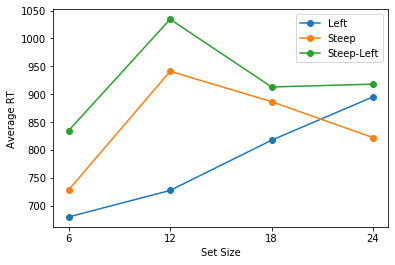

In [88]:
rt1 = [679.575, 727.126582278481, 817.25, 895.0375]
rt2 = [728.125, 940.9620253164557, 886.3875, 821.8875]
rt3 = [834.5443037974684, 1034.35, 912.8101265822785, 917.8441558441558]
index = [6, 12, 18, 24]

plt.plot(index, rt1, marker='o')
plt.plot(index, rt2, marker='o')
plt.plot(index, rt3, marker='o')
plt.legend(["Left", "Steep", "Steep-Left"])
plt.ylabel('Average RT')
plt.xticks(index)
plt.xlabel("Set Size")
plt.savefig('images/output.png')
plt.show()


